In [1]:
%matplotlib inline

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.cluster import MeanShift
from IPython.display import Image
import random

In [4]:
face_embeddings = pd.read_pickle('faces_embeddings.pkl')

## Quantity of Pictures Histogram

In [5]:
qtd_images = face_embeddings[["name", "file"]].groupby('name').count()

In [6]:
qtd_images = qtd_images.loc[qtd_images['file'] > 10]
qtd_images = qtd_images.loc[qtd_images['file'] <= 100]

In [7]:
qtd_images.head()

,file
name,
Abdullah_Gul,19
Adrien_Brody,12
Alejandro_Toledo,38
Alvaro_Uribe,35
Amelie_Mauresmo,21


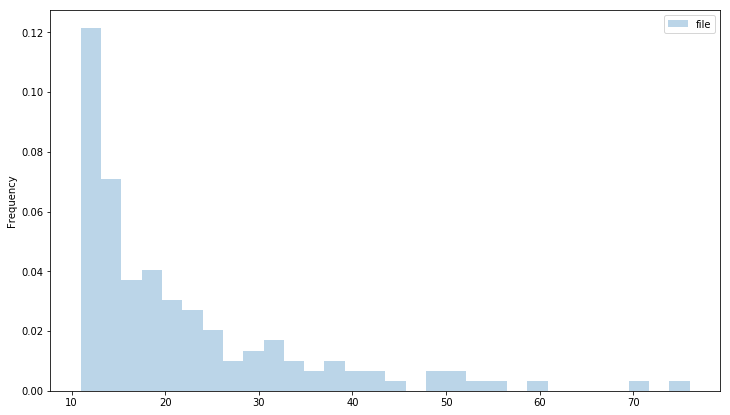

In [8]:
qtd_images.plot.hist(alpha=0.3, density = True, figsize=(12,7), bins=30)

## Selecting People

In [9]:
people = qtd_images.index.values
len(people)

137

In [10]:
random.shuffle(people)
people = people[:10]
people

array(['Bill_Clinton', 'Jeb_Bush', 'John_Bolton', 'Naomi_Watts',
       'Hans_Blix', 'Wen_Jiabao', 'Salma_Hayek', 'Lleyton_Hewitt',
       'Gloria_Macapagal_Arroyo', 'Pervez_Musharraf'], dtype=object)

In [11]:
face_embeddings = face_embeddings.loc[face_embeddings['name'].isin(people)]

## Features Separation

In [12]:
features = pd.DataFrame(face_embeddings['embeddings'].values.tolist(), index = face_embeddings.index)

In [13]:
features.head()

,0,1,2,3,4,5,6,7,8,9,...,2038,2039,2040,2041,2042,2043,2044,2045,2046,2047
74,0.429123,0.246627,1.597827,0.000000,0.032980,0.002282,0.0,0.000000,0.872730,1.828220,...,0.029241,0.000000,0.022246,16.896851,2.169653,0.000000,0.000000,0.000000,0.000000,0.023972
75,0.000000,0.401981,2.579320,0.000000,0.297915,0.000000,0.0,0.000000,0.323660,0.076795,...,0.172158,1.502681,2.505924,15.482323,1.918075,0.020950,0.281213,0.082337,0.003430,0.175159
76,0.000000,0.031267,0.077654,0.047396,0.000000,0.126073,0.0,0.000000,0.623990,2.270385,...,0.177885,0.000000,0.202592,20.149000,0.000000,0.436228,0.000000,0.118397,0.014027,0.007228
77,0.008349,0.000000,3.005130,0.021090,0.186467,0.079074,0.0,0.000000,0.975165,7.708175,...,0.447886,0.000000,0.240478,15.600139,2.064600,0.216754,0.000000,0.168671,0.000000,0.000000
78,0.352685,1.867156,1.384658,0.000000,0.023221,0.000000,0.0,1.041779,0.257982,0.393703,...,0.188279,0.337424,0.935626,12.650101,1.670524,0.082104,0.072374,0.000000,0.072509,0.001621


## Scaling

In [14]:
scaler = MinMaxScaler()

features_scaled = scaler.fit_transform(features)

In [15]:
features_scaled

array([[3.38385286e-02, 2.57599775e-02, 1.11883920e-01, ...,
        0.00000000e+00, 0.00000000e+00, 1.50828603e-03],
       [0.00000000e+00, 4.19866156e-02, 1.80610566e-01, ...,
        6.87599819e-03, 3.19672361e-04, 1.10207361e-02],
       [0.00000000e+00, 3.26583806e-03, 5.43751593e-03, ...,
        9.88737797e-03, 1.30743507e-03, 4.54759315e-04],
       ...,
       [4.92364927e-01, 3.64350403e-01, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 1.86994679e-01],
       [2.69311501e-01, 3.24311958e-01, 0.00000000e+00, ...,
        3.76701556e-02, 0.00000000e+00, 2.09930740e-01],
       [5.85761939e-02, 1.88017670e-01, 5.76819964e-04, ...,
        2.62109158e-02, 0.00000000e+00, 1.14127041e-01]])

## Silhuoette Analysis

In [16]:
import silhouette_paulo

For n_clusters = 2 The average silhouette_score is : 0.11508456161053045
For n_clusters = 3 The average silhouette_score is : 0.13488391126624294
For n_clusters = 4 The average silhouette_score is : 0.15915634899304626
For n_clusters = 5 The average silhouette_score is : 0.18803026613786908
For n_clusters = 6 The average silhouette_score is : 0.2153170021401132
For n_clusters = 7 The average silhouette_score is : 0.23780035891813628
For n_clusters = 8 The average silhouette_score is : 0.25708446280075586
For n_clusters = 9 The average silhouette_score is : 0.2796877321394824
For n_clusters = 10 The average silhouette_score is : 0.2380490712058849
For n_clusters = 11 The average silhouette_score is : 0.25514678086398357
For n_clusters = 12 The average silhouette_score is : 0.25788720835343476
For n_clusters = 13 The average silhouette_score is : 0.22267952815433903
For n_clusters = 14 The average silhouette_score is : 0.1867562740346225
For n_clusters = 15 The average silhouette_score i

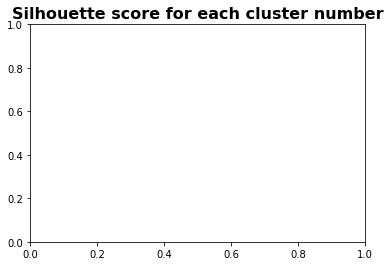

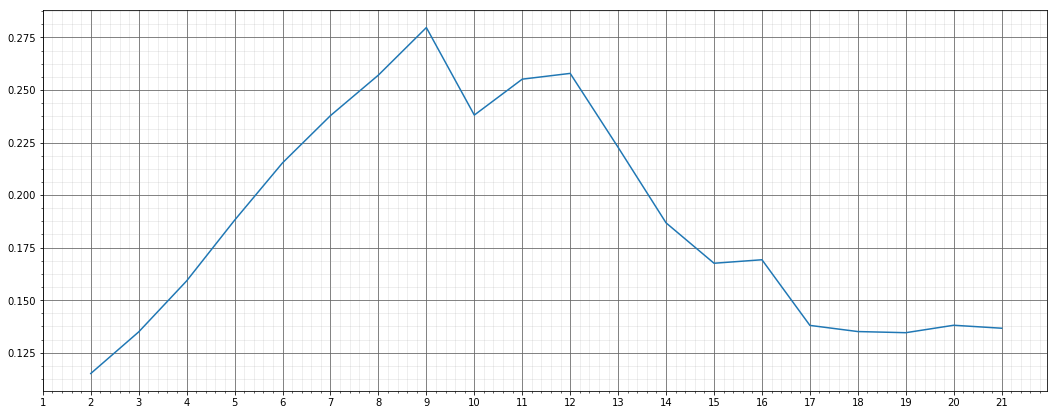

In [17]:
silhouette_paulo.analyze(features_scaled, [i+2 for i in range(len(people)*2)], show_individual_graphs = False)

## Clustering

In [18]:
model = KMeans(n_clusters=9, verbose = 0, random_state=42)
#model = MeanShift(bandwidth = len(people))

In [19]:
cluster_labels = model.fit_predict(features_scaled)
#cluster_labels = kmeans.fit_predict(features)

In [20]:
features['Cluster'] = cluster_labels
features.head()

,0,1,2,3,4,5,6,7,8,9,...,2039,2040,2041,2042,2043,2044,2045,2046,2047,Cluster
74,0.429123,0.246627,1.597827,0.000000,0.032980,0.002282,0.0,0.000000,0.872730,1.828220,...,0.000000,0.022246,16.896851,2.169653,0.000000,0.000000,0.000000,0.000000,0.023972,7
75,0.000000,0.401981,2.579320,0.000000,0.297915,0.000000,0.0,0.000000,0.323660,0.076795,...,1.502681,2.505924,15.482323,1.918075,0.020950,0.281213,0.082337,0.003430,0.175159,7
76,0.000000,0.031267,0.077654,0.047396,0.000000,0.126073,0.0,0.000000,0.623990,2.270385,...,0.000000,0.202592,20.149000,0.000000,0.436228,0.000000,0.118397,0.014027,0.007228,7
77,0.008349,0.000000,3.005130,0.021090,0.186467,0.079074,0.0,0.000000,0.975165,7.708175,...,0.000000,0.240478,15.600139,2.064600,0.216754,0.000000,0.168671,0.000000,0.000000,7
78,0.352685,1.867156,1.384658,0.000000,0.023221,0.000000,0.0,1.041779,0.257982,0.393703,...,0.337424,0.935626,12.650101,1.670524,0.082104,0.072374,0.000000,0.072509,0.001621,7


## Analyzing Clusters

In [21]:
features_scaled = pd.DataFrame(features_scaled, index = features.index)
features_scaled['Cluster'] = cluster_labels
features_scaled.head()

,0,1,2,3,4,5,6,7,8,9,...,2039,2040,2041,2042,2043,2044,2045,2046,2047,Cluster
74,0.033839,0.025760,0.111884,0.000000,0.001578,0.000155,0.0,0.000000,0.223044,0.237179,...,0.000000,0.001775,0.838595,0.344261,0.000000,0.000000,0.000000,0.000000,0.001508,7
75,0.000000,0.041987,0.180611,0.000000,0.014257,0.000000,0.0,0.000000,0.082718,0.009963,...,0.108481,0.199897,0.768392,0.304343,0.001938,0.026376,0.006876,0.000320,0.011021,7
76,0.000000,0.003266,0.005438,0.003916,0.000000,0.008582,0.0,0.000000,0.159474,0.294543,...,0.000000,0.016161,1.000000,0.000000,0.040361,0.000000,0.009887,0.001307,0.000455,7
77,0.000658,0.000000,0.210427,0.001743,0.008923,0.005383,0.0,0.000000,0.249224,1.000000,...,0.000000,0.019183,0.774239,0.327592,0.020054,0.000000,0.014086,0.000000,0.000000,7
78,0.027811,0.195023,0.096957,0.000000,0.001111,0.000000,0.0,0.111539,0.065933,0.051076,...,0.024359,0.074635,0.627828,0.265064,0.007596,0.006788,0.000000,0.006759,0.000102,7


In [22]:
features_names = features.copy()

In [23]:
features_names['name'] = face_embeddings['name']

In [24]:
people_clusters = features_names[['name', 'Cluster']].copy()

In [25]:
people_clusters['qtd'] = cluster_labels

In [26]:
qtd_clusters = people_clusters.groupby(['Cluster', 'name']).count()
qtd_clusters

qtd
Cluster name                        
0       Salma_Hayek               13
1       Jeb_Bush                  12
        Wen_Jiabao                13
2       Gloria_Macapagal_Arroyo   44
3       Lleyton_Hewitt            41
4       Naomi_Watts               22
5       Bill_Clinton              29
6       Hans_Blix                  1
        Pervez_Musharraf          18
7       John_Bolton               16
8       Hans_Blix                 38

In [27]:
qtd_clusters = people_clusters.groupby(['name','Cluster']).count()
qtd_clusters

qtd
name                    Cluster     
Bill_Clinton            5         29
Gloria_Macapagal_Arroyo 2         44
Hans_Blix               6          1
                        8         38
Jeb_Bush                1         12
John_Bolton             7         16
Lleyton_Hewitt          3         41
Naomi_Watts             4         22
Pervez_Musharraf        6         18
Salma_Hayek             0         13
Wen_Jiabao              1         13

In [28]:
features_scaled.groupby('Cluster', axis = 0).std().transpose().describe()

Cluster,0,1,2,3,4,5,6,7,8
count,2048.000000,2048.000000,2048.000000,2048.000000,2048.000000,2048.000000,2048.000000,2048.000000,2048.000000
mean,0.102992,0.129423,0.105814,0.111234,0.116651,0.106009,0.105798,0.078278,0.104133
std,0.090413,0.095898,0.078931,0.082112,0.086344,0.081571,0.082629,0.077122,0.077815
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.025046,0.049746,0.035785,0.038462,0.038599,0.032807,0.034683,0.016080,0.037301
50%,0.078394,0.105586,0.089191,0.095692,0.101366,0.088703,0.086147,0.051478,0.088865
75%,0.163454,0.193182,0.171316,0.180320,0.182942,0.167326,0.164984,0.123272,0.160693
max,0.377710,0.429268,0.320045,0.349202,0.342908,0.335864,0.394866,0.379406,0.330567


In [29]:
qtd_clusters.sum()

qtd    247
dtype: int64